Faire une API fonctionnelle

In [1]:
import tensorflow as tf
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
housing = fetch_california_housing()
X_train,X_test,y_train,y_test = train_test_split(housing.data,housing.target,test_size=0.2,random_state=42)

In [ ]:
layer_norm = keras.layers.Normalization()
layer_hidden1 = keras.layers.Dense(50,activation="relu")
layer_hidden2 = keras.layers.Dense(50,activation="relu")
layer_concat = keras.layers.Concatenate()
layer_output = keras.layers.Dense(1)

In [4]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
norm = layer_norm(input_)
hidden1 = layer_hidden1(norm)
hidden2 = layer_hidden2(hidden1)
concat = layer_concat([norm,hidden2])
output = layer_output(concat)

model = keras.Model(inputs = [input_],outputs=[output])

In [5]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['RootMeanSquaredError'])
layer_norm.adapt(X_train)
history = model.fit(X_train,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
413/413 [==============================] - 2s 2ms/step - loss: 0.9426 - root_mean_squared_error: 0.9709 - val_loss: 0.5158 - val_root_mean_squared_error: 0.7182
Epoch 2/30
413/413 [==============================] - 1s 2ms/step - loss: 0.4296 - root_mean_squared_error: 0.6554 - val_loss: 0.4293 - val_root_mean_squared_error: 0.6552
Epoch 3/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3861 - root_mean_squared_error: 0.6214 - val_loss: 0.4326 - val_root_mean_squared_error: 0.6577
Epoch 4/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3721 - root_mean_squared_error: 0.6100 - val_loss: 0.3946 - val_root_mean_squared_error: 0.6281
Epoch 5/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3500 - root_mean_squared_error: 0.5916 - val_loss: 0.3903 - val_root_mean_squared_error: 0.6248
Epoch 6/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3573 - root_mean_squared_error: 0.5978 - val_loss: 0.3688 - val_

129/129 [==============================] - 0s 763us/step


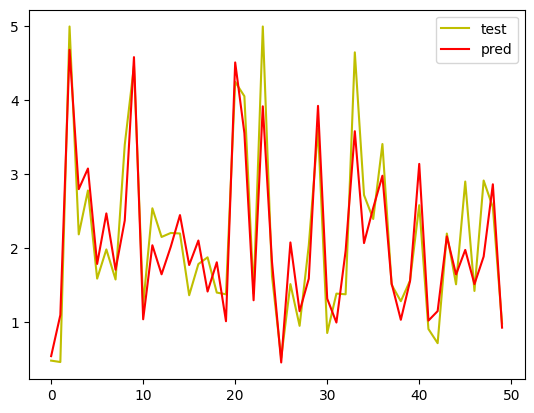

129/129 [==============================] - 0s 857us/step - loss: 0.2845 - root_mean_squared_error: 0.5334
[0.28447917103767395, 0.5333659052848816]


In [13]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
plt.figure()
plt.plot(y_test[:50], c="y", label = "test")
plt.plot(y_pred[:50], c="r", label = "pred")
plt.legend()
plt.show()
print(model.evaluate(X_test,y_test))

# autre API fonctionnelle (avec 2 entrées : 1 pour la couche wide et une pour la couche deep)

In [16]:
# 1ère entrée (variables 0 à 4 du dataset)
X_train_wide = X_train[:,:5].copy()
X_train_deep = X_train[:,2:].copy()
X_test_wide = X_test[:,:5].copy()
X_test_deep = X_test[:,2:].copy()

print(X_train_wide.shape)
print(X_train_deep.shape)

(16512, 5)
(16512, 6)


In [4]:
layer_norm12 = keras.layers.Normalization()
layer_norm22 = keras.layers.Normalization()
layer_hidden12 = keras.layers.Dense(30,activation="relu")
layer_hidden22 = keras.layers.Dense(30,activation="relu")
layer_concat12 = keras.layers.Concatenate()
layer_output12 = keras.layers.Dense(1)
input_wide = keras.layers.Input(shape=X_train_wide.shape[1:])
input_deep = keras.layers.Input(shape=X_train_deep.shape[1:])



In [5]:
norm12 = layer_norm12(input_wide)
norm22 = layer_norm22(input_deep)
hidden12 = layer_hidden12(norm22)
hidden22 = layer_hidden22(hidden12)
concat12 = layer_concat12([norm12,hidden22])
output12 = layer_output12(concat12)


In [6]:
model2 = keras.Model(inputs=[input_wide,input_deep],outputs=[output12])

In [7]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model2.compile(optimizer=optimizer,
              loss='mse',
              metrics=['RootMeanSquaredError'])
layer_norm12.adapt(X_train_wide)
layer_norm22.adapt(X_train_deep)
history2 = model2.fit((X_train_wide,X_train_deep),y_train,epochs=30,validation_split=0.2)

Epoch 1/30
413/413 [==============================] - 2s 2ms/step - loss: 1.6996 - root_mean_squared_error: 1.3037 - val_loss: 0.6099 - val_root_mean_squared_error: 0.7810
Epoch 2/30
413/413 [==============================] - 1s 2ms/step - loss: 0.4857 - root_mean_squared_error: 0.6969 - val_loss: 0.4687 - val_root_mean_squared_error: 0.6846
Epoch 3/30
413/413 [==============================] - 1s 2ms/step - loss: 0.4366 - root_mean_squared_error: 0.6607 - val_loss: 0.4383 - val_root_mean_squared_error: 0.6621
Epoch 4/30
413/413 [==============================] - 1s 2ms/step - loss: 0.4142 - root_mean_squared_error: 0.6435 - val_loss: 0.4283 - val_root_mean_squared_error: 0.6544
Epoch 5/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3983 - root_mean_squared_error: 0.6311 - val_loss: 0.4057 - val_root_mean_squared_error: 0.6370
Epoch 6/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3818 - root_mean_squared_error: 0.6179 - val_loss: 0.4021 - val_

129/129 [==============================] - 0s 1ms/step


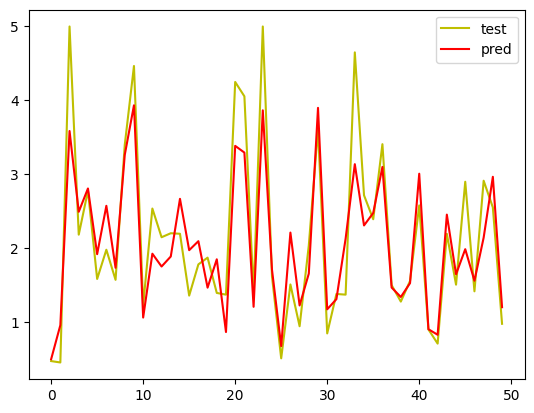

129/129 [==============================] - 0s 1ms/step - loss: 0.3231 - root_mean_squared_error: 0.5684
[0.3230881094932556, 0.5684084296226501]


In [9]:
import matplotlib.pyplot as plt

y_pred2 = model2.predict((X_test_wide,X_test_deep))
plt.figure()
plt.plot(y_test[:50], c="y", label = "test")
plt.plot(y_pred2[:50], c="r", label = "pred")
plt.legend()
plt.show()
print(model2.evaluate((X_test_wide,X_test_deep),y_test))

In [17]:
input_wide3 = keras.layers.Input(shape=X_train_wide.shape[1:],name="input_wide3")
input_deep3 = keras.layers.Input(shape=X_train_deep.shape[1:],name="input_deep3")
layer_norm13 = keras.layers.Normalization()
layer_norm23 = keras.layers.Normalization()
norm13 = layer_norm13(input_wide3)
norm23 = layer_norm23(input_deep3)
hidden13 = keras.layers.Dense(30,activation="relu")(norm23)
hidden23 = keras.layers.Dense(30,activation="relu")(hidden13)
concat13 = keras.layers.concatenate([hidden23,norm13])
output_aux3 = keras.layers.Dense(1,name = "output_aux3")(hidden23)
output3 = keras.layers.Dense(1,name = "output3")(concat13)



In [18]:
layer_norm13.adapt(X_train_wide)
layer_norm23.adapt(X_train_deep)
optimizer3 = keras.optimizers.Adam(1e-3)
model3 = keras.Model(inputs = [input_wide3,input_deep3], outputs = [output3,output_aux3])
model3.compile(optimizer=optimizer3,
              loss = {"output3":"mse","output_aux3":"mse"},
              loss_weights={"output3":0.9,"output_aux3":0.1},
              metrics=["RootMeanSquaredError"])


In [22]:
model3.fit({"input_wide3":X_train_wide,"input_deep3":X_train_deep},
           {"output3":y_train,"output_aux3":y_train},
           validation_split=0.2,
           epochs = 30)

Epoch 1/30
413/413 [==============================] - 1s 3ms/step - loss: 0.3243 - output3_loss: 0.3176 - output_aux3_loss: 0.3847 - output3_root_mean_squared_error: 0.5635 - output_aux3_root_mean_squared_error: 0.6203 - val_loss: 0.3501 - val_output3_loss: 0.3441 - val_output_aux3_loss: 0.4042 - val_output3_root_mean_squared_error: 0.5866 - val_output_aux3_root_mean_squared_error: 0.6358
Epoch 2/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3284 - output3_loss: 0.3220 - output_aux3_loss: 0.3863 - output3_root_mean_squared_error: 0.5674 - output_aux3_root_mean_squared_error: 0.6216 - val_loss: 0.3824 - val_output3_loss: 0.3758 - val_output_aux3_loss: 0.4415 - val_output3_root_mean_squared_error: 0.6131 - val_output_aux3_root_mean_squared_error: 0.6644
Epoch 3/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3580 - output3_loss: 0.3515 - output_aux3_loss: 0.4169 - output3_root_mean_squared_error: 0.5928 - output_aux3_root_mean_squared_error: 0.64

129/129 [==============================] - 0s 2ms/step - loss: 0.3206 - output3_loss: 0.3155 - output_aux3_loss: 0.3667 - output3_root_mean_squared_error: 0.5617 - output_aux3_root_mean_squared_error: 0.6056


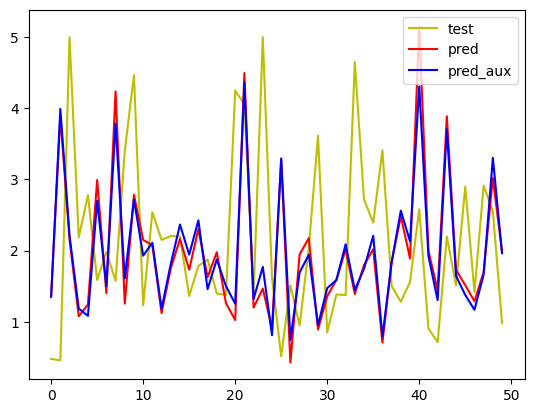

{'loss': 0.3206079304218292, 'output3_loss': 0.3154853284358978, 'output_aux3_loss': 0.36671182513237, 'output3_root_mean_squared_error': 0.561680793762207, 'output_aux3_root_mean_squared_error': 0.6055673360824585}


In [23]:
import matplotlib.pyplot as plt

y_pred3,y_predaux3 = model3.predict({"input_wide3":X_train_wide,"input_deep3":X_train_deep})
eval_results = model3.evaluate({"input_wide3":X_test_wide,"input_deep3":X_test_deep},
                              {"output3":y_test,"output_aux3":y_test},
                              return_dict=True)
plt.figure()
plt.plot(y_test[:50], c="y", label = "test")
plt.plot(y_pred3[:50], c="r", label = "pred")
plt.plot(y_predaux3[:50], c="b", label = "pred_aux")
plt.legend()
plt.show()
print(eval_results)